In [1]:
import os

import pandas as pd

from graphs import load_dataset_to_graph
from measurements import get_graph_measurements, compare_graph_measurements, print_comparison_results
from recreate_graph import recreate_by_priority_rank_no_attributes, recreate_by_priority_rank_y_real, recreate_by_priority_rank, get_trained_model

Using TensorFlow backend.


Processing highschool_2011
Comparison with random rankings


/home/smoq/.virtualenvs/cna/lib/python3.5/site-packages/networkx/algorithms/assortativity/correlation.py:287: RuntimeWarning: divide by zero encountered in double_scalars
  return (xy*(M-ab)).sum()/numpy.sqrt(vara*varb)


(KS test p-value)  degree_centrality: 0.0007516359865883434           [passed: False]
(KS test p-value)  closeness_centrality: 0.000751635986588346         [passed: False]
(KS test p-value)  betweenness_centrality: 7.5885154889784956e-06     [passed: False]
(KS test p-value)  pagerank: 2.641725814496577e-05                    [passed: False]
(abs distance)     average_shortest_path_length: 0.06769441366273388  [passed: True]
(abs distance)     diameter: 0.25                                     [passed: False]
(abs distance)     degree_centralization: 0.5434442571589999          [passed: False]
(abs distance)     closeness_centralization: 0.6870106760486355       [passed: False]
(abs distance)     betweenness_centralization: 0.032934642905588375   [passed: True]
(abs distance)     pagerank_centralization: 0.5947433409025474        [passed: False]
(abs distance)     density: 0.004972214097689335                      [passed: True]
(abs distance)     degree_assortativity: inf             

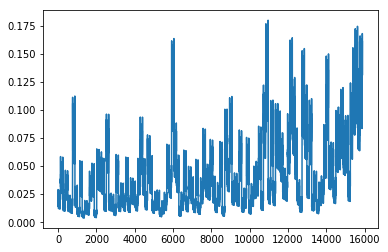

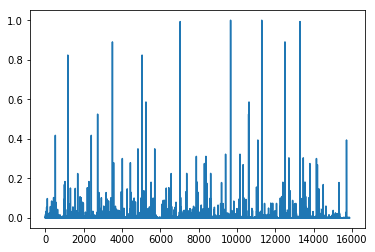

(KS test p-value)  degree_centrality: 0.00026291363523941585          [passed: False]
(KS test p-value)  closeness_centrality: 0.005044986488469954         [passed: False]
(KS test p-value)  betweenness_centrality: 2.041332529637141e-06      [passed: False]
(KS test p-value)  pagerank: 2.5181921499697763e-07                   [passed: False]
(abs distance)     average_shortest_path_length: 0.06505442930708563  [passed: True]
(abs distance)     diameter: 0.25                                     [passed: False]
(abs distance)     degree_centralization: 0.5434442571589988          [passed: False]
(abs distance)     closeness_centralization: 0.641363069053206        [passed: False]
(abs distance)     betweenness_centralization: 0.04367713701253795    [passed: True]
(abs distance)     pagerank_centralization: 0.5922518699568252        [passed: False]
(abs distance)     density: 0.004972214097689335                      [passed: True]
(abs distance)     degree_assortativity: inf             

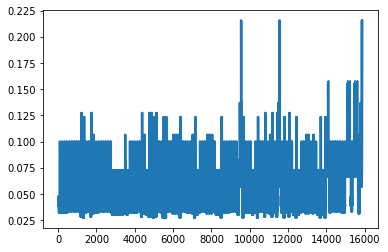

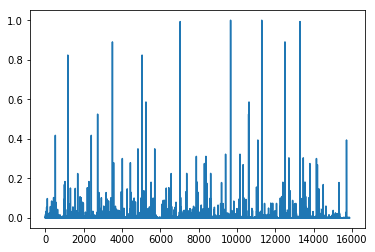

(KS test p-value)  degree_centrality: 0.0032124690911688775           [passed: False]
(KS test p-value)  closeness_centrality: 0.00015171335941685263       [passed: False]
(KS test p-value)  betweenness_centrality: 7.5885154889784956e-06     [passed: False]
(KS test p-value)  pagerank: 0.0004482025847002505                    [passed: False]
(abs distance)     average_shortest_path_length: 0.0687373704452122   [passed: True]
(abs distance)     diameter: 0.25                                     [passed: False]
(abs distance)     degree_centralization: 0.5796455691313995          [passed: False]
(abs distance)     closeness_centralization: 0.6366763548788782       [passed: False]
(abs distance)     betweenness_centralization: 0.02484089328819633    [passed: True]
(abs distance)     pagerank_centralization: 0.5808844211934807        [passed: False]
(abs distance)     density: 0.004972214097689335                      [passed: True]
(abs distance)     degree_assortativity: 1.0             

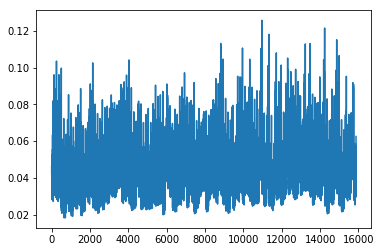

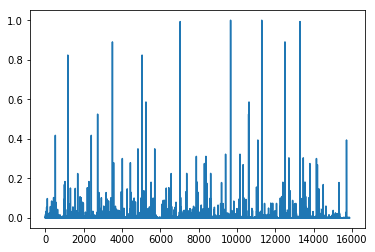

(KS test p-value)  degree_centrality: 0.0012399744450185212           [passed: False]
(KS test p-value)  closeness_centrality: 0.000751635986588346         [passed: False]
(KS test p-value)  betweenness_centrality: 7.5885154889784956e-06     [passed: False]
(KS test p-value)  pagerank: 7.5885154889784684e-06                   [passed: False]
(abs distance)     average_shortest_path_length: 0.06687960367642269  [passed: True]
(abs distance)     diameter: 0.25                                     [passed: False]
(abs distance)     degree_centralization: 0.5503878566522028          [passed: False]
(abs distance)     closeness_centralization: 0.5836574275074581       [passed: False]
(abs distance)     betweenness_centralization: 0.0239916324093989     [passed: True]
(abs distance)     pagerank_centralization: 0.5677570921772532        [passed: False]
(abs distance)     density: 0.004972214097689335                      [passed: True]
(abs distance)     degree_assortativity: 0.99999956416053

/home/smoq/.virtualenvs/cna/lib/python3.5/site-packages/networkx/algorithms/assortativity/correlation.py:287: RuntimeWarning: invalid value encountered in sqrt
  return (xy*(M-ab)).sum()/numpy.sqrt(vara*varb)


In [2]:
prepared_datasets_path = 'prepared_datasets'
prepared_dataframes_path = 'prepared_dataframes'
delimiter = '\t'

prepared_dataset_names = [
    #'primary_school', 'workplace', 
    'highschool_2011', #'highschool_2012', 'hospital', 
    #'moreno_blogs', 'moreno_sheep', 'moreno_seventh',
    #'moreno_seventh',
    # big datasets
    #'petster-hamster', 'email-Eu'
]

for dataset_name in prepared_dataset_names:
    print('Processing {}'.format(dataset_name))
    dataset_path = os.path.join(prepared_datasets_path, dataset_name)
    dataframe_path = os.path.join(prepared_dataframes_path, dataset_name)
    graph = load_dataset_to_graph(dataset_path, node_limit=500)
    
    # random rankings
    print('Comparison with random rankings')
    new_graph = recreate_by_priority_rank_no_attributes(graph)
    
    graph_measurements = get_graph_measurements(graph)
    new_graph_measurements = get_graph_measurements(new_graph)
    comparison = compare_graph_measurements(graph_measurements, new_graph_measurements)
    print_comparison_results(comparison)
    print()
    
    # only graph attrs
    print('Comparison with only graph attributes')
    graph_attrs_dataframe_path = os.path.join(dataframe_path, 'graph_attrs.csv')
    df = pd.read_csv(graph_attrs_dataframe_path, delimiter=delimiter)
    
    model = get_trained_model(df, epochs=4)
    new_graph = recreate_by_priority_rank(graph, df, model, show_graphs=True)
    
    graph_measurements = get_graph_measurements(graph)
    new_graph_measurements = get_graph_measurements(new_graph)
    comparison = compare_graph_measurements(graph_measurements, new_graph_measurements)
    print_comparison_results(comparison)
    print()
    
    # only real attrs
    print('Comparison with only real attributes')
    real_attrs_dataframe_path = os.path.join(dataframe_path, 'real_attrs.csv')
    df = pd.read_csv(real_attrs_dataframe_path, delimiter=delimiter)
    
    model = get_trained_model(df, epochs=4)
    new_graph = recreate_by_priority_rank(graph, df, model, show_graphs=True)
    
    graph_measurements = get_graph_measurements(graph)
    new_graph_measurements = get_graph_measurements(new_graph)
    comparison = compare_graph_measurements(graph_measurements, new_graph_measurements)
    print_comparison_results(comparison)
    print()
    
    # both graph and real attrs
    print('Comparison with both graph and real attributes')
    graph_real_attrs_dataframe_path = os.path.join(dataframe_path, 'graph_real_attrs.csv')
    df = pd.read_csv(graph_real_attrs_dataframe_path, delimiter=delimiter)
    
    model = get_trained_model(df, epochs=4)
    new_graph = recreate_by_priority_rank(graph, df, model, show_graphs=True)
    
    graph_measurements = get_graph_measurements(graph)
    new_graph_measurements = get_graph_measurements(new_graph)
    comparison = compare_graph_measurements(graph_measurements, new_graph_measurements)
    print_comparison_results(comparison)
    print()
    
    # using real data (real y - no prediction)
    print('Comparison with using real target value data')
    real_y_dataframe_path = os.path.join(dataframe_path, 'no_attrs.csv')
    df = pd.read_csv(real_y_dataframe_path, delimiter=delimiter)
    
    new_graph = recreate_by_priority_rank_y_real(graph, df)
    
    graph_measurements = get_graph_measurements(graph)
    new_graph_measurements = get_graph_measurements(new_graph)
    comparison = compare_graph_measurements(graph_measurements, new_graph_measurements)
    print_comparison_results(comparison)
    print()
    